In [2]:
import pandas as pd

# Load your new dataset
df = pd.read_csv("/content/sample_101_Marketing.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (100, 11)


,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0


In [3]:
# Drop duplicates
df = df.drop_duplicates()

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(0)

# Convert date column to datetime if exists
for col in df.columns:
    if "date" in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             100 non-null    int64         
 1   c_date         100 non-null    datetime64[ns]
 2   campaign_name  100 non-null    object        
 3   category       100 non-null    object        
 4   campaign_id    100 non-null    int64         
 5   impressions    100 non-null    int64         
 6   mark_spent     100 non-null    float64       
 7   clicks         100 non-null    int64         
 8   leads          100 non-null    int64         
 9   orders         100 non-null    int64         
 10  revenue        100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 8.7+ KB


In [4]:
# Example metrics (adjust column names to your dataset)
if 'Clicks' in df.columns and 'Impressions' in df.columns:
    df['CTR'] = df['Clicks'] / df['Impressions'].replace({0:1})

if 'Conversions' in df.columns and 'Clicks' in df.columns:
    df['Conversion_Rate'] = df['Conversions'] / df['Clicks'].replace({0:1})

if 'Revenue' in df.columns and 'Spend' in df.columns:
    df['ROI'] = (df['Revenue'] - df['Spend']) / df['Spend'].replace({0:1})

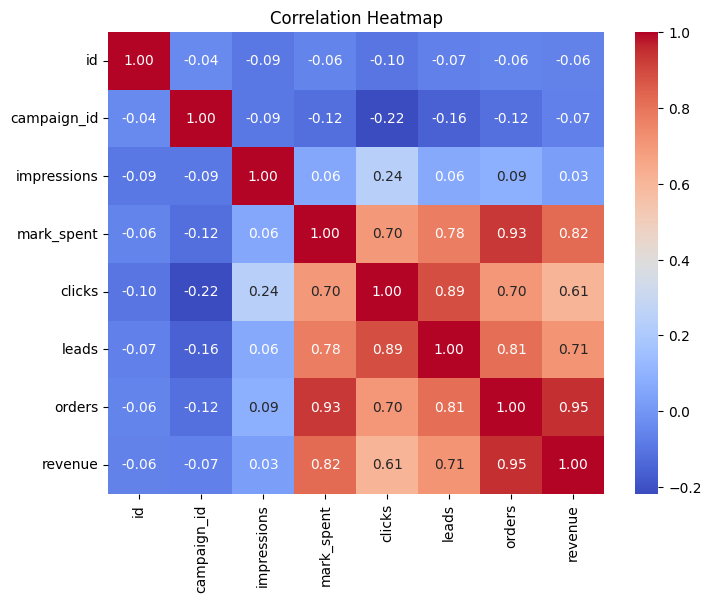

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top campaigns by CTR
if 'Campaign_ID' in df.columns and 'CTR' in df.columns:
    top_campaigns = df.groupby('Campaign_ID')['CTR'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_campaigns.index, y=top_campaigns.values)
    plt.title("Top 10 Campaigns by CTR")
    plt.ylabel("Average CTR")
    plt.xlabel("Campaign_ID")
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# List all column names
print(df.columns)

Index(['id', 'c_date', 'campaign_name', 'category', 'campaign_id',
       'impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue'],
      dtype='object')


In [7]:
# Calculate CTR
df['ctr'] = df['clicks'] / df['impressions'].replace({0:1})

# Calculate ROI
df['roi'] = (df['revenue'] - df['mark_spent']) / df['mark_spent'].replace({0:1})

In [8]:
import plotly.express as px

# Average CTR by Campaign
fig = px.bar(df.groupby('campaign_id')['ctr'].mean().reset_index(),
             x='campaign_id', y='ctr', title="Average CTR by Campaign",
             labels={'ctr':'Average CTR', 'campaign_id':'Campaign ID'}, height=500)
fig.show()

# ROI vs CTR scatter
fig2 = px.scatter(df, x='ctr', y='roi', color='campaign_id',
                  title="CTR vs ROI", labels={'ctr':'CTR','roi':'ROI','campaign_id':'Campaign ID'}, height=500)
fig2.show()

In [9]:
# Top 5 Campaigns by CTR
if 'ctr' in df.columns and 'campaign_id' in df.columns:
    top5_campaigns = df.groupby('campaign_id')['ctr'].mean().sort_values(ascending=False).head(5)
    print("Top 5 Campaigns by CTR:\n", top5_campaigns)

# ROI by Campaign
if 'roi' in df.columns and 'campaign_id' in df.columns:
    top_roi_campaigns = df.groupby('campaign_id')['roi'].mean().sort_values(ascending=False).head(5)
    print("\nTop 5 Campaigns by ROI:\n", top_roi_campaigns)

# If you want device/category performance instead, use 'category' column
if 'category' in df.columns and 'ctr' in df.columns:
    category_perf = df.groupby('category')['ctr'].mean().sort_values(ascending=False)
    print("\nCTR by Category:\n", category_perf)

Top 5 Campaigns by CTR:
 campaign_id
4387490     0.029391
89459845    0.019517
374754      0.009982
544756      0.009786
10934       0.009411
Name: ctr, dtype: float64

Top 5 Campaigns by ROI:
 campaign_id
10934       2.508759
4387490     2.125950
89459845    0.883406
9034945     0.506863
374754      0.381185
Name: roi, dtype: float64

CTR by Category:
 category
search        0.012091
social        0.009938
influencer    0.009697
media         0.000824
Name: ctr, dtype: float64


In [10]:
df.to_csv("/content/Processed_Digital_Marketing_Log.csv", index=False)
print("Processed dataset saved!")

Processed dataset saved!
